In [5]:
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
class CallOption_contract:
    def __init__(self, underlying, strike, days_to_expiry, risk_free_rate, volatility):
        self._underlying = underlying
        self._strike = strike
        self._days_to_expiry = days_to_expiry/365
        self._risk_free_rate = risk_free_rate/100
        self._volatility = volatility/100
        self._coords = self.calc_option_premium_n_greeks()

    def calc_option_premium_n_greeks(self):
        d1 = (math.log(self._underlying/self._strike) + self._days_to_expiry*(self._risk_free_rate + (self._volatility**2)/2))/(self._volatility*math.sqrt(self._days_to_expiry))
        d2 = d1 - self._volatility*math.sqrt(self._days_to_expiry)
        fv_strike = self._strike*math.exp(-1*self._risk_free_rate*self._days_to_expiry)
        call_premium = self._underlying*norm.cdf(d1) - fv_strike*norm.cdf(d2)
        put_premium = fv_strike*norm.cdf(-1*d2) - self._underlying*norm.cdf(-1*d1)
        call_delta = norm.cdf(d1)
        call_gamma = norm.pdf(d1)/(self._underlying*self._volatility*math.sqrt(self._days_to_expiry))
        call_vega = self._underlying*norm.pdf(d1)*math.sqrt(self._days_to_expiry)/100
        call_theta = (-1*self._underlying*norm.pdf(d1)*self._volatility/(2*math.sqrt(self._days_to_expiry)) - self._risk_free_rate*fv_strike*norm.cdf(d2))/365
        return call_premium, call_delta, call_gamma, call_vega, call_theta
    
class PutOption_contract(CallOption_contract):
    def calc_option_premium_n_greeks(self):
        d1 = (math.log(self._underlying/self._strike) + self._days_to_expiry*(self._risk_free_rate + (self._volatility**2)/2))/(self._volatility*math.sqrt(self._days_to_expiry))
        d2 = d1 - self._volatility*math.sqrt(self._days_to_expiry)
        fv_strike = self._strike*math.exp(-1*self._risk_free_rate*self._days_to_expiry)
        put_premium = fv_strike*norm.cdf(-1*d2) - self._underlying*norm.cdf(-1*d1)
        put_delta = norm.cdf(d1) - 1
        put_gamma = norm.pdf(d1)/(self._underlying*self._volatility*math.sqrt(self._days_to_expiry))
        put_vega = self._underlying*norm.pdf(d1)*math.sqrt(self._days_to_expiry)/100
        put_theta = (-1*self._underlying*norm.pdf(d1)*self._volatility/(2*math.sqrt(self._days_to_expiry)) + self._risk_free_rate*fv_strike*norm.cdf(-1*d2))/365
        return put_premium, put_delta, put_gamma, put_vega, put_theta

<IPython.core.display.Javascript object>


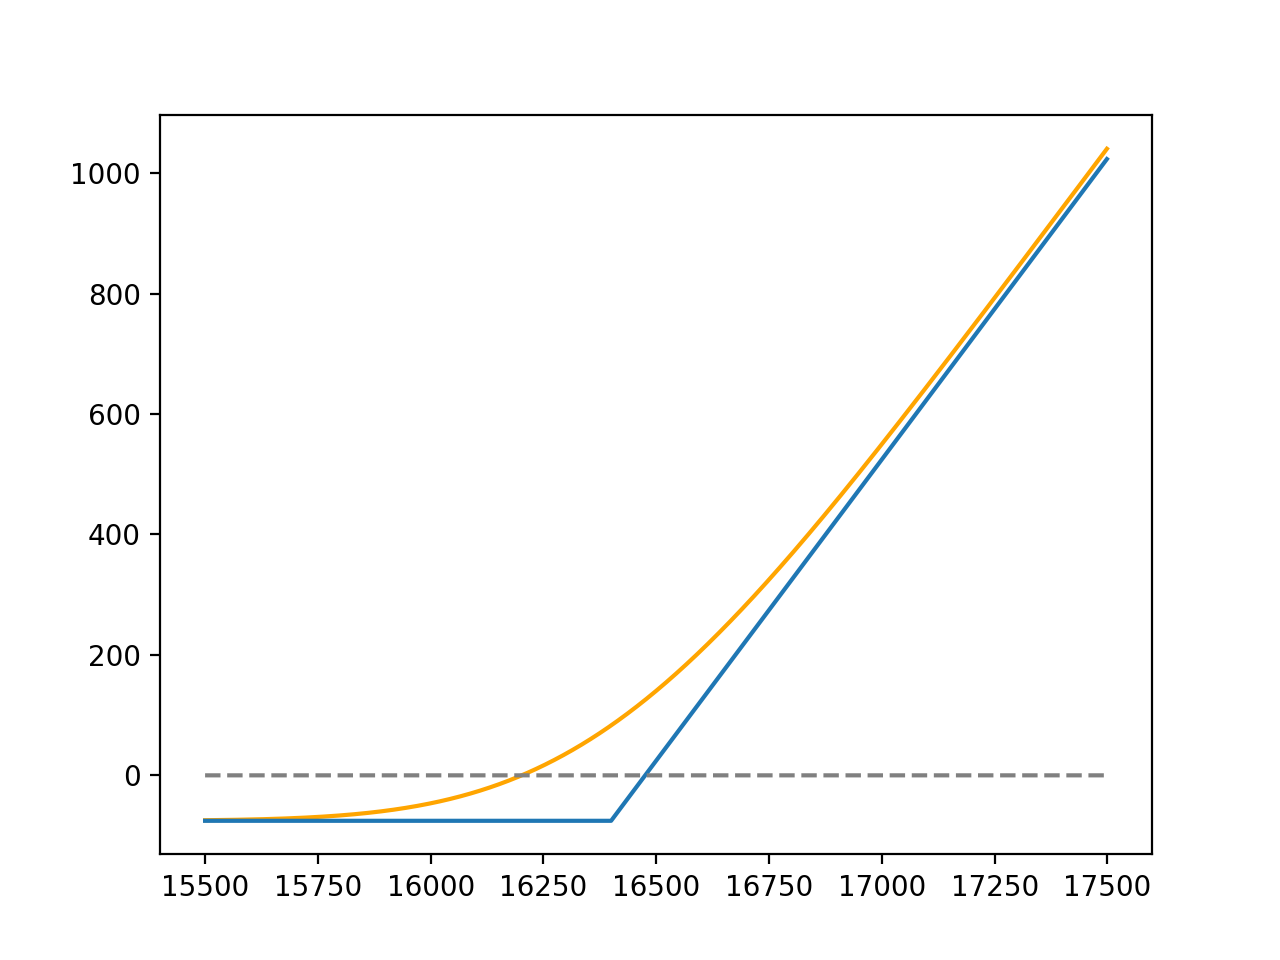

In [21]:
#buy call graph now
stock_range = np.arange(15500, 17500, 1)
strike = 16400
stock_now = 16201.8
days_to_expiry = 5
volatility = 19.58
pp_call = CallOption_contract(stock_now, strike, days_to_expiry, 7.5, volatility)._coords[0]

call_val_now = np.array([CallOption_contract(x, strike, days_to_expiry, 7.5, volatility)._coords[0] for x in stock_range]) - pp_call
call_val_at_expiry = np.array([max(-1*pp_call, x - strike - pp_call) for x in stock_range])

plt.plot(stock_range, call_val_now, color='orange')
plt.plot(stock_range, call_val_at_expiry)
y = [0]*len(call_val_at_expiry)
plt.plot(stock_range, y, '--', color='grey')

<IPython.core.display.Javascript object>


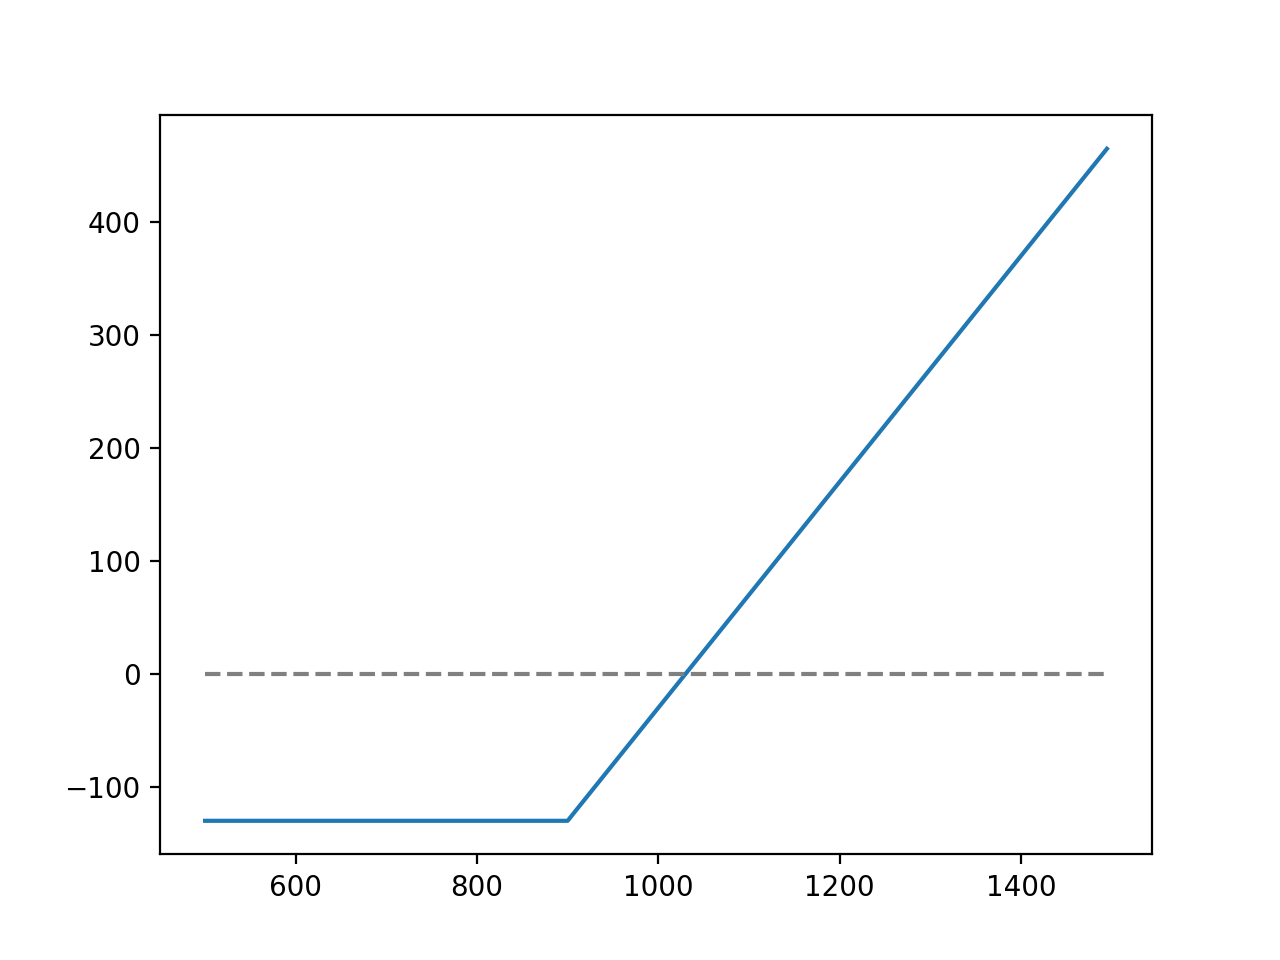

In [25]:
#buy call
strike = 900
pp_call = 130
stock1 = np.arange(500, 1500, 5)

call_val_at_expiry = np.array([max(-1*pp_call, x - strike - pp_call) for x in stock1])

plt.plot(stock1, call_val_at_expiry)
y = [0]*len(call_val_at_expiry)
plt.plot(stock1, y, '--', color='grey')

<IPython.core.display.Javascript object>


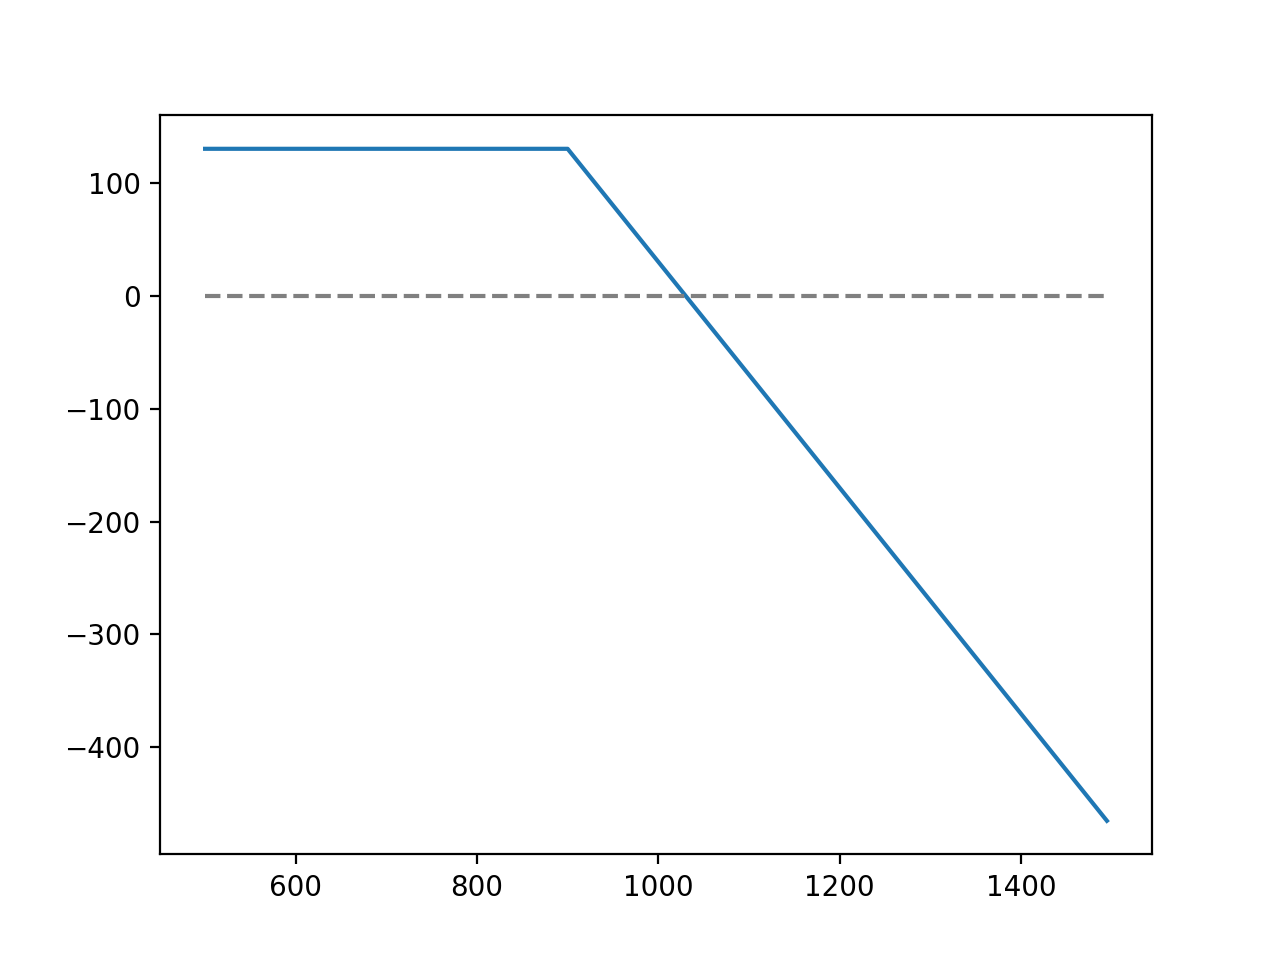

In [41]:
#sell call graph
strike = 900
pp_call = 130
stock1 = np.arange(500, 1500, 5)
call_val_at_expiry = np.array([min(pp_call, -1*(x - strike - pp_call)) for x in stock1])
plt.plot(stock1, call_val_at_expiry)
y = [0]*len(call_val_at_expiry)
plt.plot(stock1, y, '--', color='grey')

<IPython.core.display.Javascript object>


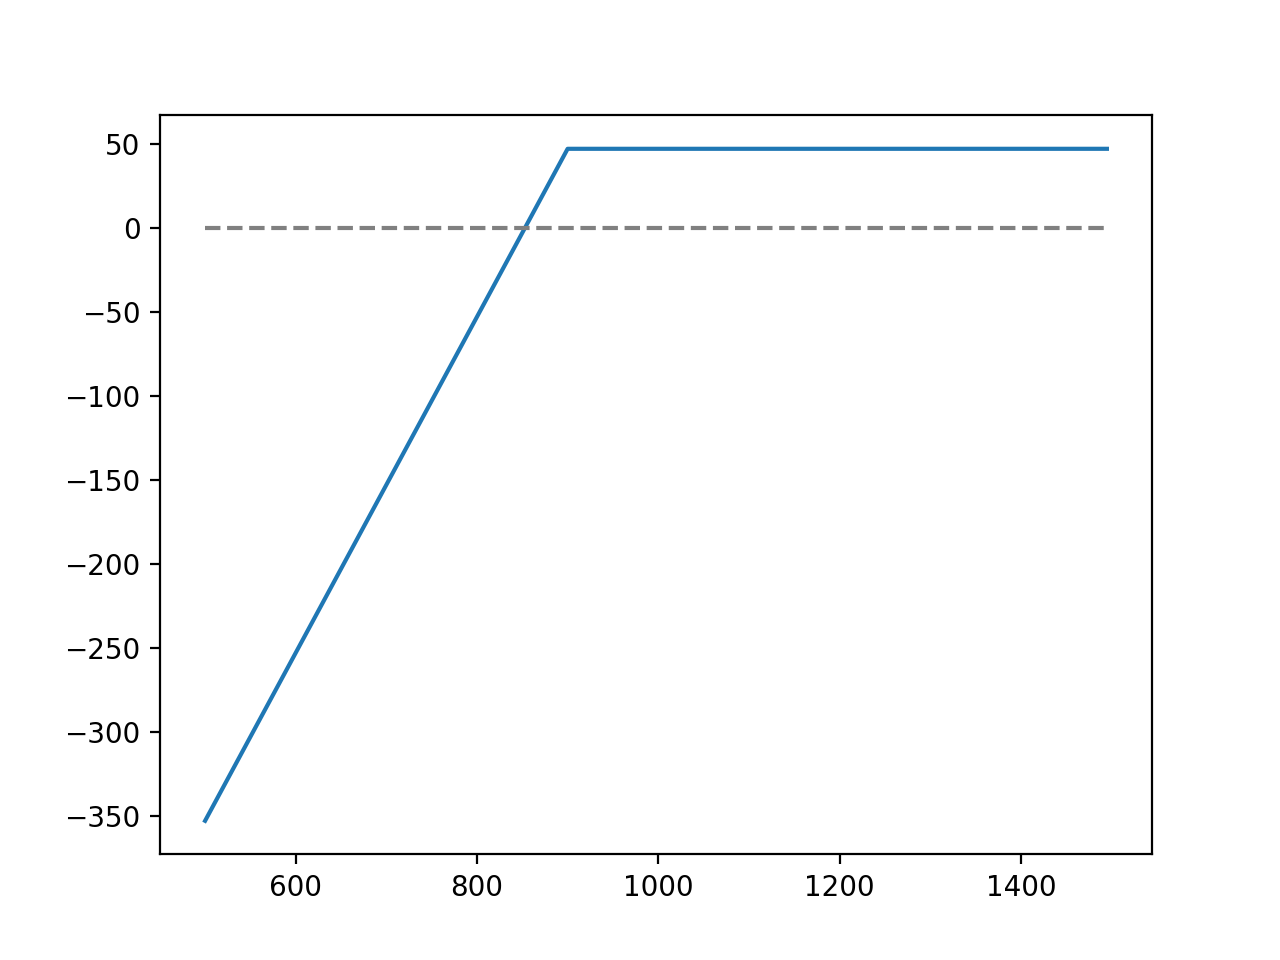

In [26]:
# sell put
stock = 1000
pp_put = 47
put_val_at_expiry = np.array([min(pp_put, x - strike + pp_put) for x in stock1])
plt.plot(stock1, put_val_at_expiry)
y = [0]*len(call_val_at_expiry)
plt.plot(stock1, y, '--', color='grey')

<IPython.core.display.Javascript object>


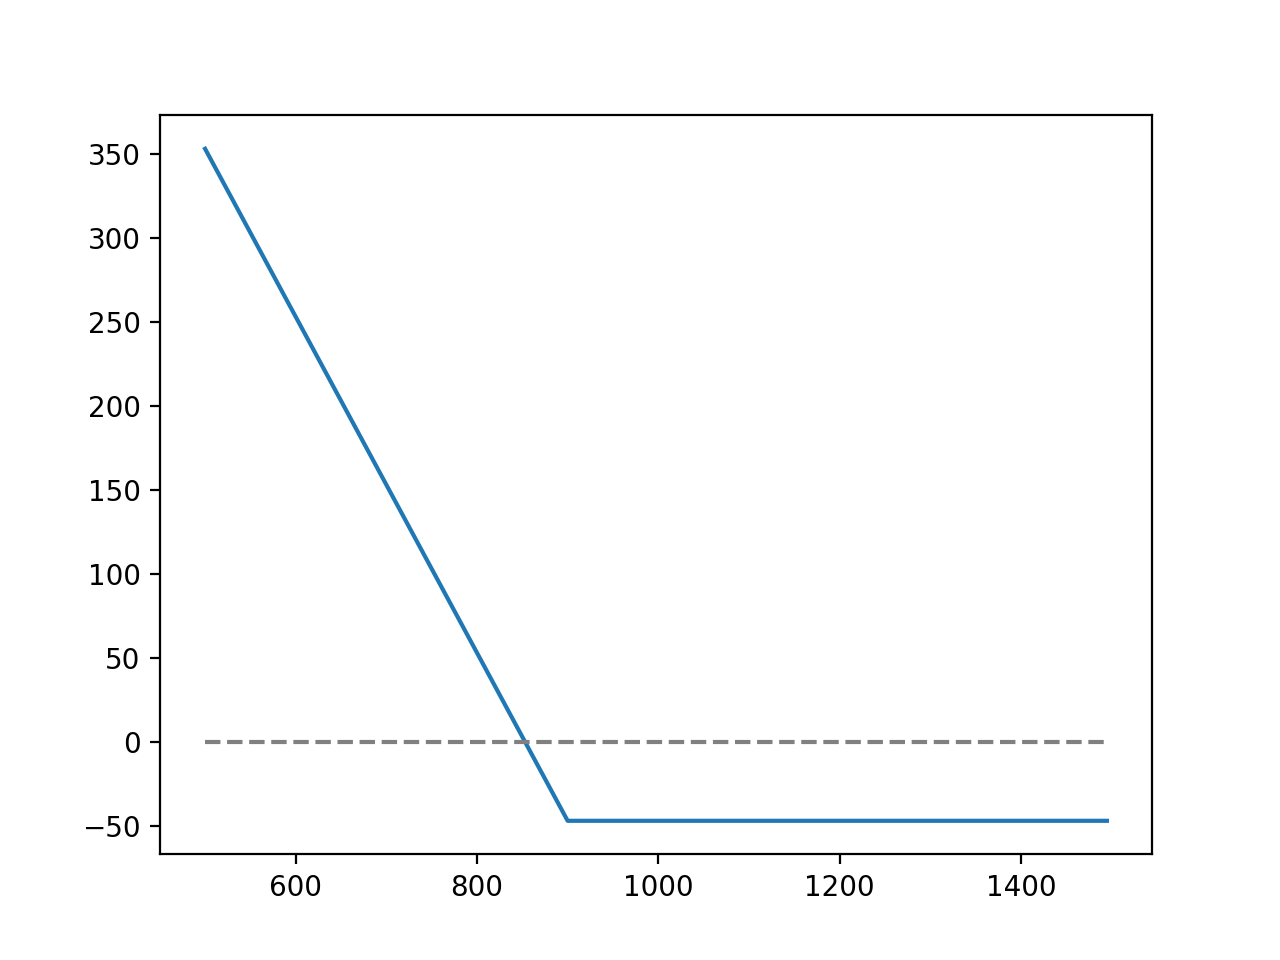

In [45]:
#buy put 
stock = 1000
pp_put = 47
put_val_at_expiry = np.array([max(-1*pp_put, -1*(x - strike + pp_put)) for x in stock1])
plt.plot(stock1, put_val_at_expiry)
y = [0]*len(call_val_at_expiry)
plt.plot(stock1, y, '--', color='grey')

<IPython.core.display.Javascript object>


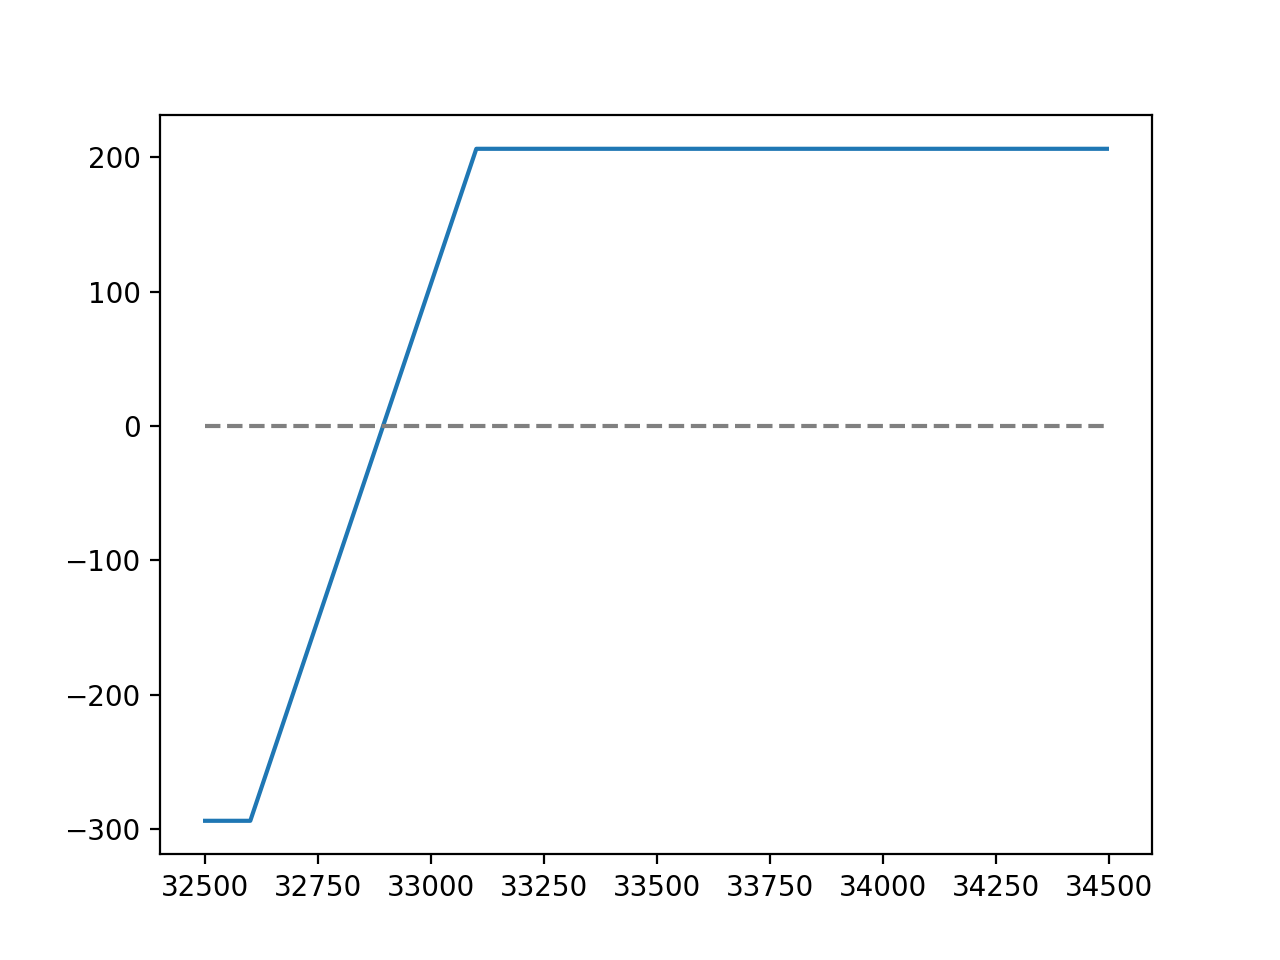

In [7]:
#bull call
#buy call
#stock at 34483.8
stock_range = np.arange(32500, 34500, 5)

strike1 = 32600
pp_call1 = 443.70
call_val_now = np.array([CallOption_contract(x, strike1, 3, 7.5, 22.99)._coords[0] for x in stock_range]) - pp_call1
call1_val_at_expiry = np.array([max(-1*pp_call1, x - strike1 - pp_call1) for x in stock_range])
#plt.plot(stock1, call1_val_at_expiry)

strike2 = 33100
pp_call2 = 150
call2_val_at_expiry = np.array([min(pp_call2, -1*(x - strike2 - pp_call2)) for x in stock_range])
#plt.plot(stock1, call2_val_at_expiry)

#spread
spread = call1_val_at_expiry + call2_val_at_expiry
plt.plot(stock_range, spread)
y = [0]*len(call1_val_at_expiry)
plt.plot(stock_range, y, '--', color='grey')

In [ ]:
#iron condor
stock_range = np.arange(33500, 35500, 1)
stock_now = 34483
risk_free_rate = 7.5
volatility = 25.454

In [5]:
#spread maker
def leg(strike,days_to_expiry,order_type):
    pp_call = Option_contract(stock_now, strike, days_to_expiry, risk_free_rate, volatility)._coords[0]
    call_val_now = np.array([Option_contract(x, strike, days_to_expiry, risk_free_rate, volatility)._coords[0] for x in stock_range]) - pp_call
    if order_type == 's':
        call_val_at_expiry = np.array([min(pp_call, -1*(x - strike - pp_call)) for x in stock_range])
    elif order_type == 'b':
        call_val_at_expiry = np.array([max(-1*pp_call, x - strike - pp_call) for x in stock_range])
    return call_val_now, call_val_at_expiry

<IPython.core.display.Javascript object>


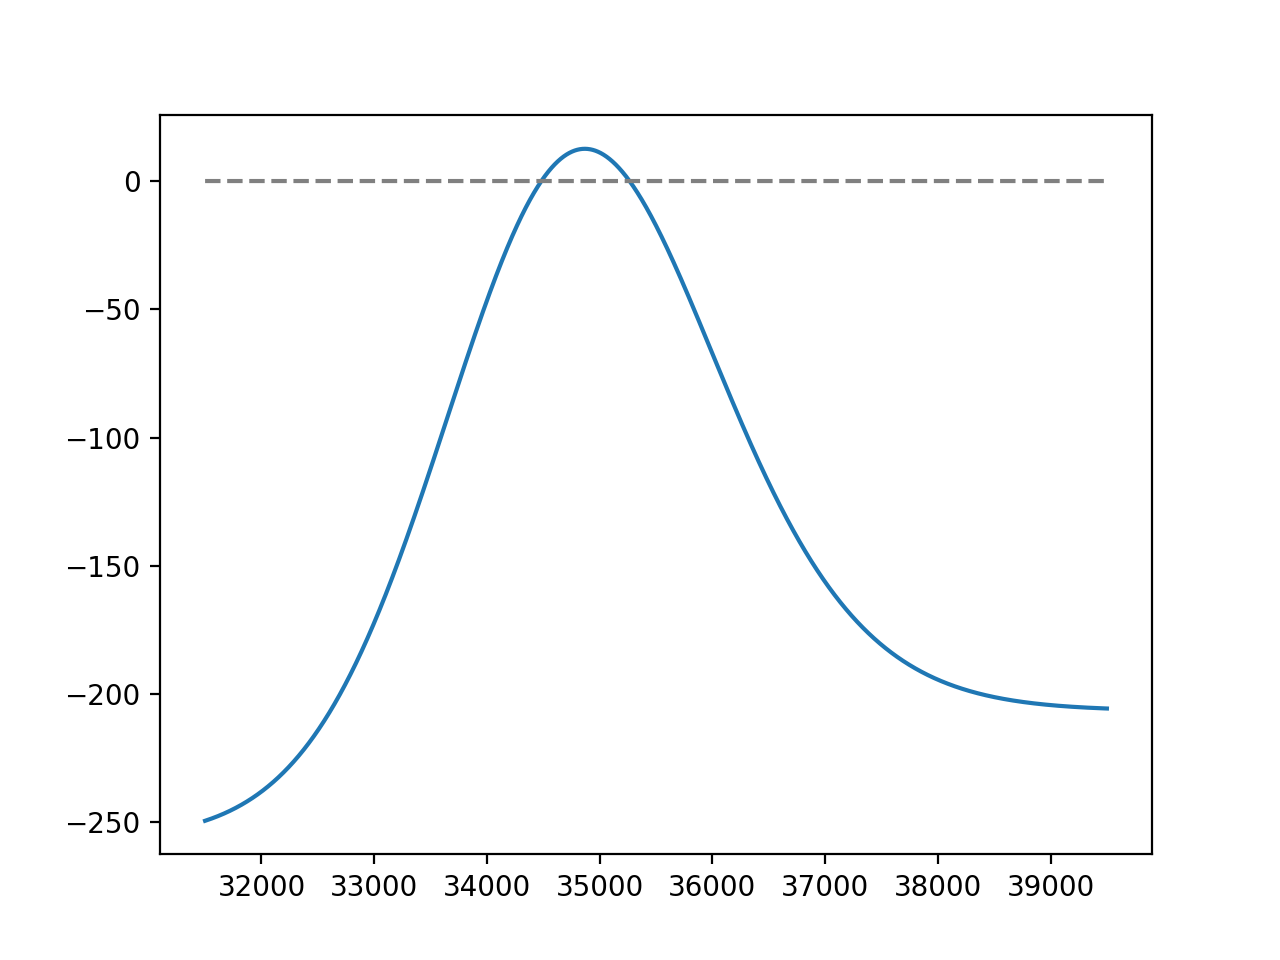

In [113]:
#calender
stock_range = np.arange(31500, 39500, 1)
stock_now = 34483
leg1 = leg(34800, 4, 's')
leg2 = leg(34800, 11, 'b')
sp1now = leg2[0] - leg1[0]
#sp1expiry = leg2[1] + leg1[1]
plt.plot(stock_range, sp1now)
#plt.plot(stock_range, sp1expiry)
y = [0]*len(leg1[0])
plt.plot(stock_range, y, '--', color='grey')

<IPython.core.display.Javascript object>


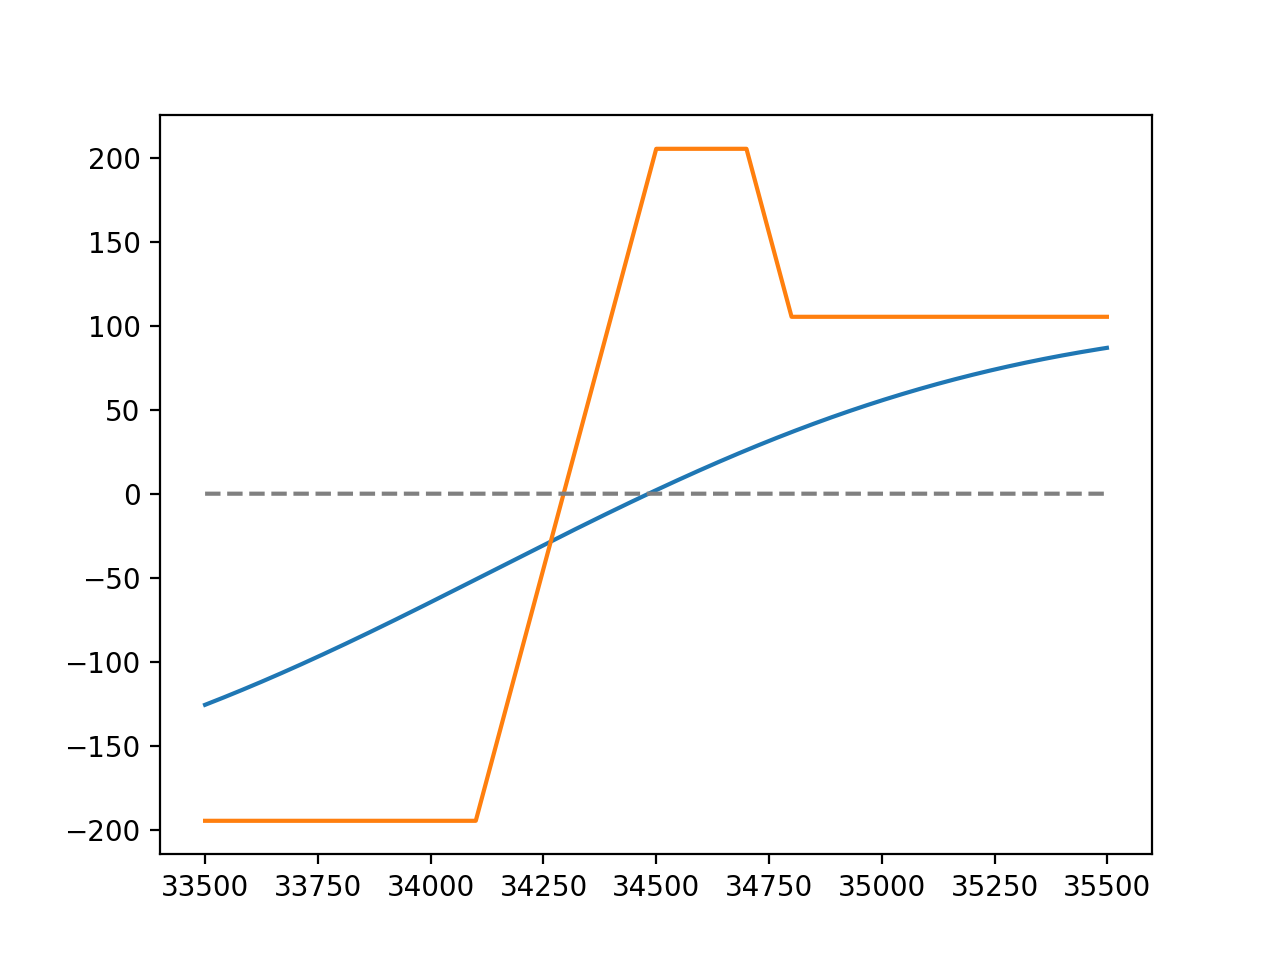

In [102]:
t = 3
leg1 = leg(34500,t,'s')
leg2 = leg(34700,t,'s')
leg3 = leg(34100,t,'b')
leg4 = leg(34800,t,'b')
spnow = leg3[0]+leg4[0]-leg2[0]-leg1[0]
spexpiry = leg1[1]+leg2[1]+leg3[1]+leg4[1]
plt.plot(stock_range, spnow)
plt.plot(stock_range, spexpiry)
y = [0]*len(leg1[0])
plt.plot(stock_range, y, '--', color='grey')

In [ ]:
#put raio

